In [ ]:
"""
Created on Mon Jan  8 2020

@author: Or Duek
Check Aging data timeseries
"""

# KPE timeseries analysis
# Using the connUtils.py file


In [1]:
import os
import pandas as pd
from nilearn import plotting
import numpy as np
from connUtils import removeVars, timeSeriesSingle, createCorMat
import matplotlib.pyplot as plt

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
# here we load the atlas - this is the Yeo one, but we can use others
#atlas_filename = '/home/or/Downloads/1000subjects_reference_Yeo/Yeo_JNeurophysiol11_SplitLabels/MNI152/Yeo2011_17Networks_N1000.split_components.FSL_MNI152_1mm.nii.gz'
#atlas_labes = pd.read_csv('/home/or/Downloads/1000subjects_reference_Yeo/Yeo_JNeurophysiol11_SplitLabels/Yeo2011_17networks_N1000.split_components.glossary.csv')
#coords = coords = plotting.find_parcellation_cut_coords(labels_img=atlas_filename)
# take one subjects file 

In [2]:
# use aal atlas
import nilearn
aal_atlas = nilearn.datasets.fetch_atlas_aal(version='SPM12', data_dir=None, url=None, resume=True, verbose=1)


In [3]:
atlas_filename = aal_atlas.maps
atlas_labels = aal_atlas.labels

In [5]:
atlas_labels
atlas_labels.index('Amygdala_R')

41

In [6]:
# put functional file, confound file and event file here - this is for one subject
func_file = '/media/Data/KPE_BIDS/derivatives/fmriprep/sub-{sub}/ses-{ses}/func/sub-{sub}_ses-{ses}_task-Memory_space-MNI152NLin6Asym_desc-preproc_bold.nii.gz'
confound_file = '/media/Data/KPE_BIDS/derivatives/fmriprep/sub-{sub}/ses-{ses}/func/sub-{sub}_ses-{ses}_task-Memory_desc-confounds_regressors.tsv'
events_file = '/media/Data/PTSD_KPE/condition_files/withNumbers/sub-{sub}_ses-{ses}.csv'

In [7]:
sub = '1322'
ses = '1'

In [8]:
# create timeseries of all ROIs in atlas
timeSer= timeSeriesSingle(func_file.format(sub=sub, ses=ses), confound_file.format(sub=sub, ses=ses), atlas_filename)

[NiftiLabelsMasker.fit_transform] loading data from /home/or/nilearn_data/aal_SPM12/aal/atlas/AAL.nii
Resampling labels
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/media/Data/KPE_BIDS/derivatives/fmriprep/sub-1322/ses-1/func/sub-1322_ses-1_task-Memory_space-MNI152NLin6Asym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': 0.01,
  'labels_img': '/home/or/nilearn_data/aal_SPM12/aal/atlas/AAL.nii',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': 6,
  'standardize': True,
  't_r': 1,
  'target_affine': None,
  'target_shape': None}, confounds=array([[ 7.004881e+03, ..., -3.041630e-03],
       ...,
       [ 6.749717e+03, ..., -2.198550e-02]]), dtype=None, memory=Memory(cachedir='nilearn_cashe/joblib'), memory_level=1, verbose=5)
[NiftiLabelsMasker.transform_single_imgs] Loading data from /media/Data

In [9]:
timeSer.shape
# 116 regions in aal atlas

(1150, 116)

In [10]:
events =  pd.read_csv(events_file.format(sub=sub, ses=ses), sep=r'\s+')
events

,onset,duration,trial_type,trial_type_N
0,16.013,122.246,trauma,trauma1
1,143.220,115.761,relax,relax1
2,263.397,122.803,sad,sad1
3,391.141,115.757,relax,relax2
4,511.190,122.237,trauma,trauma2
5,642.469,122.798,sad,sad2
6,769.435,115.764,relax,relax3
7,889.335,122.242,trauma,trauma3
8,1015.616,122.802,sad,sad3


In [11]:
# create vector of zeroes and ones according to onset + duration
x1 = np.zeros(timeSer.shape[0])

for line in events.iterrows():
    onset = round(line[1][0])
    duration = round(line[1][1])
    x1[onset:onset+duration] = 1
x1

array([0., 0., 0., ..., 0., 0., 0.])

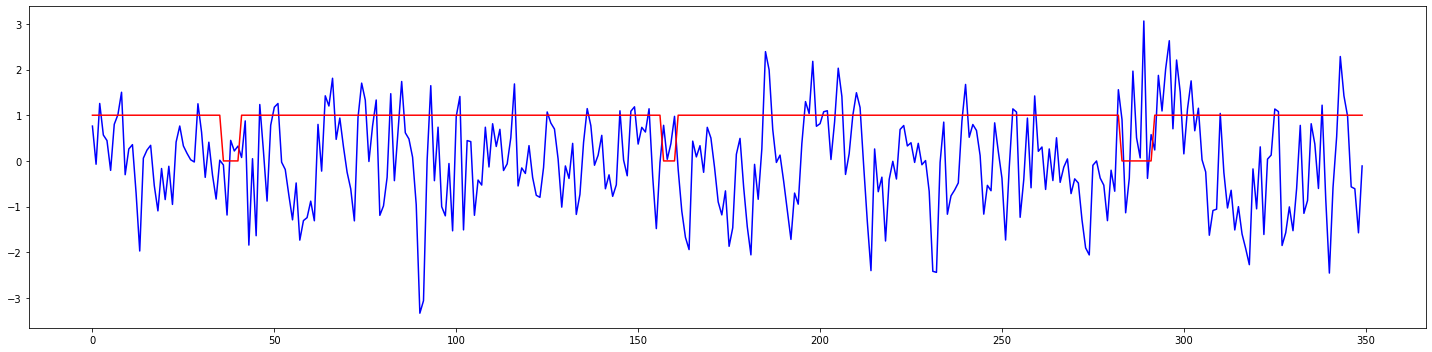

In [14]:
plt.figure(figsize = [20,5])
plt.plot(timeSer[350:700,40], color = "blue") # time series of region 43 (V1)
plt.plot(x1[350:700], color="red")
plt.tight_layout()

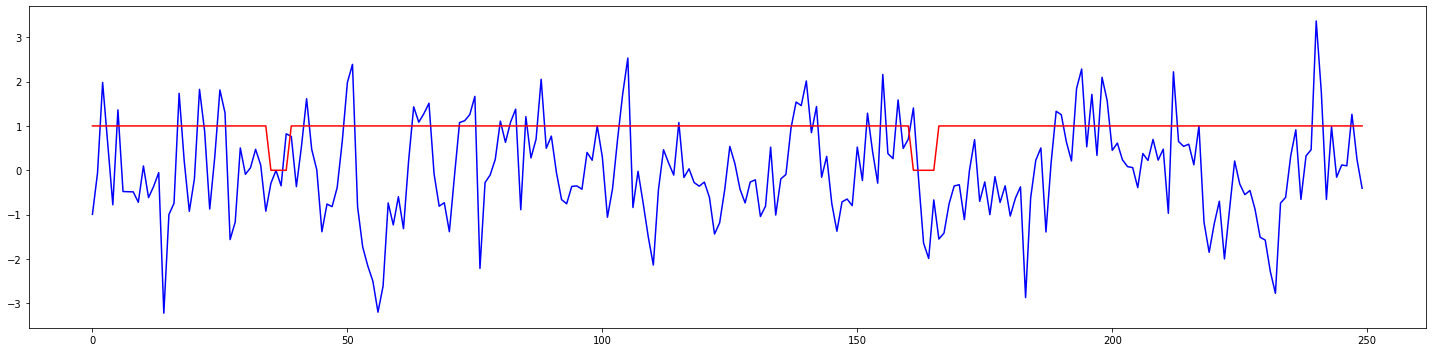

In [15]:
plt.figure(figsize = [20,5])
plt.plot(timeSer[850:1100,40], color = "blue") # time series of region 43 (V1)
plt.plot(x1[850:1100], color="red")
plt.tight_layout()

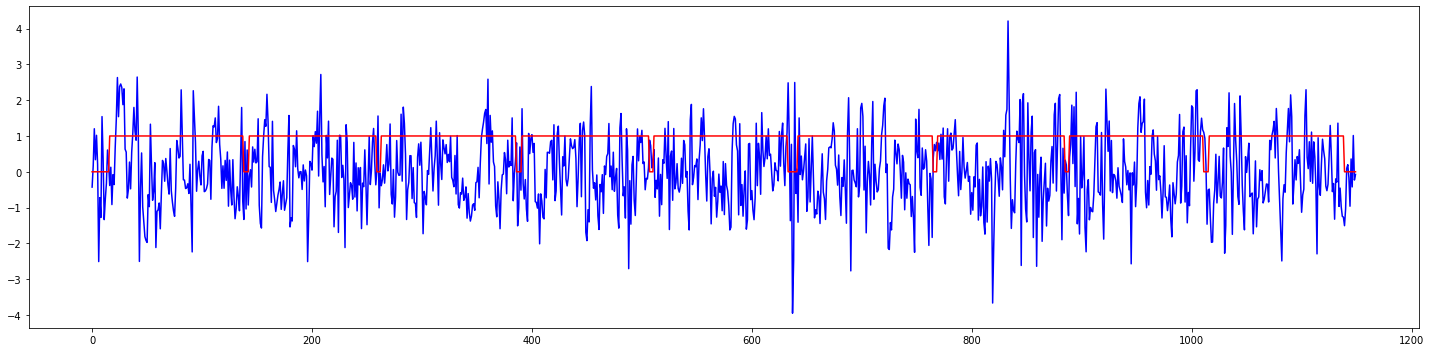

In [17]:
plt.figure(figsize = [20,5])
plt.plot(timeSer[:,41], color = "blue") # time series of region 43 (V1)
plt.plot(x1, color="red")
plt.tight_layout()